Please enter a 1 to train the model, 2 to load an existing model:
1


100%|███████████████████████████████████████████████████████████████████████████| 18663/18663 [01:29<00:00, 208.20it/s]


Loaded:
9993 Cat Images 53%,
 0 Dog Images 0%,
 635 Normal Spell Card Images 3%,
 267 Continuous Spell Card Images 1%,
203 Equip Spell Card Images 1%,
 267 Quick-Play Spell Card Images 1%,
 183 Field Spell Card Images 0.98%,
55 Ritual Spell Card Images 0.29%,
 871 Normal Trap Card Images 4%,
 355 Continuous Trap Card Images 1%,
116 Counter Trap Card Images 0.62%,
 468 Normal Monster Card Images 2%,
 3928 Effect Monster Card Images 21%,
67 Ritual Monster Card Images 0.36%,
 293 Fusion Monster Card Images 1%,
 282 Synchro Monster Card Images 1%,
359 Xyz Monster Card Images 1%,
 233 Pendulum Monster Card Images 1%,
 85 Link Monster Card Images 0.46%,
3 Token Monster Card Images 0.02%
18663 Total Images Loaded
Creating model from scratch
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 15863 samples, validate on 2800 samples
Epoch 1/40
15863/15863 [==============================] - 33s 2ms/sample - loss: 0.9835 - tp: 27.0000 - fp: 134.0000 - tn: 301263.0000 - fn: 15836.0000 - acc

Epoch 19/40
15863/15863 [==============================] - 29s 2ms/sample - loss: 0.3518 - tp: 12296.0000 - fp: 996.0000 - tn: 300401.0000 - fn: 3567.0000 - accuracy: 0.9856 - precision: 0.9251 - recall: 0.7751 - auc: 0.9926 - val_loss: 0.2362 - val_tp: 2476.0000 - val_fp: 71.0000 - val_tn: 53129.0000 - val_fn: 324.0000 - val_accuracy: 0.9929 - val_precision: 0.9721 - val_recall: 0.8843 - val_auc: 0.9977
Epoch 20/40
15863/15863 [==============================] - 29s 2ms/sample - loss: 0.3487 - tp: 12431.0000 - fp: 895.0000 - tn: 300502.0000 - fn: 3432.0000 - accuracy: 0.9864 - precision: 0.9328 - recall: 0.7836 - auc: 0.9937 - val_loss: 0.2304 - val_tp: 2497.0000 - val_fp: 46.0000 - val_tn: 53154.0000 - val_fn: 303.0000 - val_accuracy: 0.9938 - val_precision: 0.9819 - val_recall: 0.8918 - val_auc: 0.9980
Epoch 21/40
15863/15863 [==============================] - 29s 2ms/sample - loss: 0.3390 - tp: 12642.0000 - fp: 819.0000 - tn: 300578.0000 - fn: 3221.0000 - accuracy: 0.9873 - precisio

15863/15863 [==============================] - 29s 2ms/sample - loss: 0.2140 - tp: 14132.0000 - fp: 660.0000 - tn: 300737.0000 - fn: 1731.0000 - accuracy: 0.9925 - precision: 0.9554 - recall: 0.8909 - auc: 0.9972 - val_loss: 0.1301 - val_tp: 2657.0000 - val_fp: 22.0000 - val_tn: 53178.0000 - val_fn: 143.0000 - val_accuracy: 0.9971 - val_precision: 0.9918 - val_recall: 0.9489 - val_auc: 0.9992
Epoch 40/40
15863/15863 [==============================] - 29s 2ms/sample - loss: 0.2056 - tp: 14256.0000 - fp: 611.0000 - tn: 300786.0000 - fn: 1607.0000 - accuracy: 0.9930 - precision: 0.9589 - recall: 0.8987 - auc: 0.9975 - val_loss: 0.1315 - val_tp: 2655.0000 - val_fp: 21.0000 - val_tn: 53179.0000 - val_fn: 145.0000 - val_accuracy: 0.9970 - val_precision: 0.9922 - val_recall: 0.9482 - val_auc: 0.9991
INFO:tensorflow:Assets written to: Y:/Models/YuGiOhProject\assets


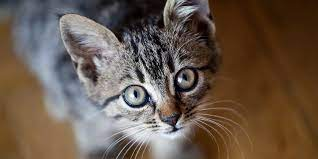

This image most likely belongs to Cat with a 12.52 percent confidence.


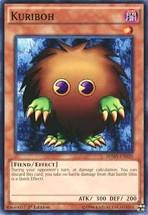

This image most likely belongs to Effect Monster Card with a 12.52 percent confidence.


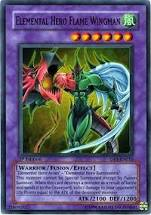

This image most likely belongs to Fusion Monster Card with a 12.52 percent confidence.


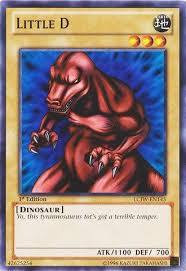

This image most likely belongs to Normal Monster Card with a 12.52 percent confidence.


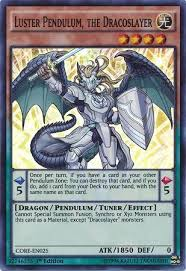

This image most likely belongs to Pendulum Monster Card with a 12.52 percent confidence.


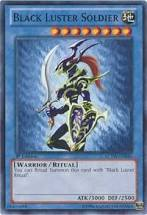

This image most likely belongs to Ritual Monster Card with a 12.52 percent confidence.


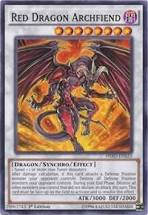

This image most likely belongs to Synchro Monster Card with a 12.52 percent confidence.


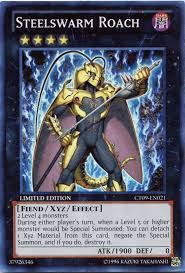

This image most likely belongs to Xyz Monster Card with a 12.52 percent confidence.


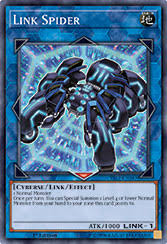

This image most likely belongs to Link Monster Card with a 12.52 percent confidence.


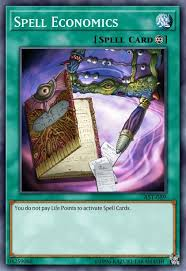

This image most likely belongs to Quick-Play Spell Card with a 12.52 percent confidence.


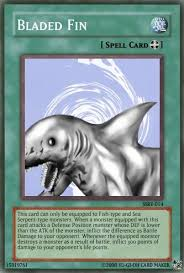

This image most likely belongs to Continuous Spell Card with a 12.52 percent confidence.


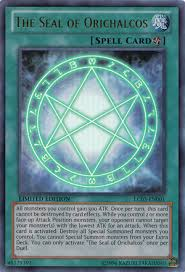

This image most likely belongs to Continuous Spell Card with a 12.52 percent confidence.


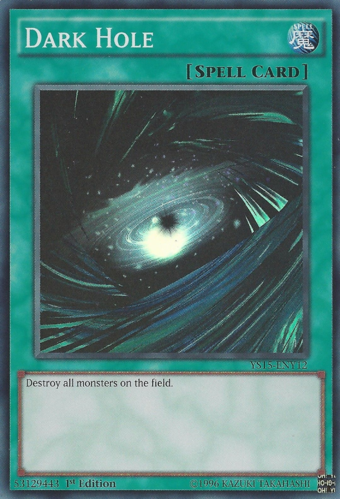

This image most likely belongs to Normal Spell Card with a 12.52 percent confidence.


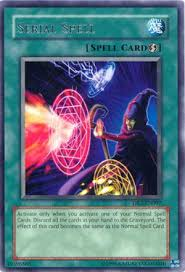

This image most likely belongs to Quick-Play Spell Card with a 12.52 percent confidence.


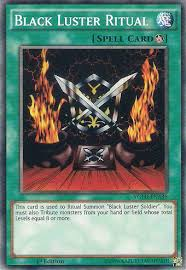

This image most likely belongs to Quick-Play Spell Card with a 12.52 percent confidence.


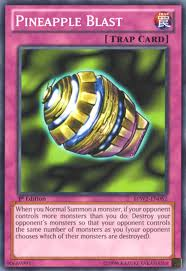

This image most likely belongs to Normal Trap Card with a 12.52 percent confidence.


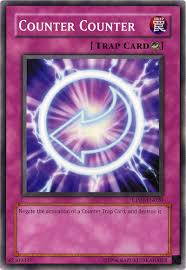

This image most likely belongs to Counter Trap Card with a 12.52 percent confidence.


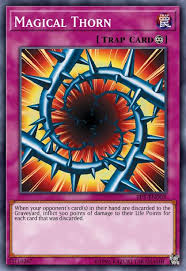

This image most likely belongs to Continuous Trap Card with a 12.52 percent confidence.


2063

In [12]:
import tensorflow as tf
import gc
import os
import sys
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LeakyReLU
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.metrics import Accuracy, BinaryAccuracy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from pathlib import Path
from PIL import Image
%matplotlib inline

# Begin by collecting any unused memory
gc.collect()

# Define Constants

# Class constants
class_names = [
    'Cat', 'Dog',
    'Normal Spell Card', 'Continuous Spell Card', 'Equip Spell Card', 'Quick-Play Spell Card',
    'Field Spell Card', 'Ritual Spell Card',
    'Normal Trap Card', 'Continuous Trap Card', 'Counter Trap Card',
    'Normal Monster Card', 'Effect Monster Card', 'Ritual Monster Card', 'Fusion Monster Card',
    'Synchro Monster Card', 'Xyz Monster Card', 'Pendulum Monster Card', 'Link Monster Card', 'Token Monster Card'
]

# class_weights={"Cat": 1, "Dog": 1, "Normal Spell Card": 10, "Continuous Spell Card": 20, "Equip Spell Card": 20,
#               "Quick-Play Spell Card": 20, "Field Spell Card": 20, "Ritual Spell Card": 25, "Normal Trap Card": 10,
#               "Continuous Trap Card": 20, "Counter Trap Card": 23, "Normal Monster Card": 13, "Effect Monster Card": 1,
#               "Ritual Monster Card": 25, "Fusion Monster Card": 20, "Synchro Monster Card": 20, "Xyz Monster Card": 20,
#               "Pendulum Monster Card": 20, "Link Monster Card": 25, "Token Monster Card": 10}
class_weights={0: 1, 1: 1, 2: 10, 3: 22, 4: 22, 5: 20, 6: 22, 7: 28, 8: 10, 9: 20, 10: 23, 11: 13, 12: 1,
              13: 25, 14: 20, 15: 20, 16: 20, 17: 20, 18: 25, 19: 10}

# Animal Paths
cat_images_path = 'Y:/Datasets/Test/Cats/'

# Monster Card Paths
efct_mon_path = 'Y:/Datasets/YuGiOhCards/Monster_Cards/Effect_Monster_Cards/'
fus_mon_path = 'Y:/Datasets/YuGiOhCards/Monster_Cards/Fusion_Monster_Cards/'
link_mon_path = 'Y:/Datasets/YuGiOhCards/Monster_Cards/Link_Monster_Cards/'
norm_mon_path = 'Y:/Datasets/YuGiOhCards/Monster_Cards/Normal_Monster_Cards/'
pend_mon_path = 'Y:/Datasets/YuGiOhCards/Monster_Cards/Pendulum_Monster_Cards/'
rit_mon_path = 'Y:/Datasets/YuGiOhCards/Monster_Cards/Ritual_Monster_Cards/'
sync_mon_path = 'Y:/Datasets/YuGiOhCards/Monster_Cards/Synchro_Monster_Cards/'
tok_mon_path = 'Y:/Datasets/YuGiOhCards/Monster_Cards/Token_Monster_Cards/'
xyz_mon_path = 'Y:/Datasets/YuGiOhCards/Monster_Cards/Xyz_Monster_Cards/'

# Spell Card Paths
cont_spell_path = 'Y:/Datasets/YuGiOhCards/Spell_Cards/Continuous_Spell_Cards/'
equip_spell_path = 'Y:/Datasets/YuGiOhCards/Spell_Cards/Equip_Spell_Cards/'
field_spell_path = 'Y:/Datasets/YuGiOhCards/Spell_Cards/Field_Spell_Cards/'
norm_spell_path = 'Y:/Datasets/YuGiOhCards/Spell_Cards/Normal_Spell_Cards/'
quick_spell_path = 'Y:/Datasets/YuGiOhCards/Spell_Cards/Quick-Play_Spell_Cards/'
rit_spell_path = 'Y:/Datasets/YuGiOhCards/Spell_Cards/Ritual_Spell_Cards/'

# Trap Card Paths
cont_trap_path = 'Y:/Datasets/YuGiOhCards/Trap_Cards/Continuous_Trap_Cards/'
counter_trap_path = 'Y:/Datasets/YuGiOhCards/Trap_Cards/Counter_Trap_Cards/'
norm_trap_path = 'Y:/Datasets/YuGiOhCards/Trap_Cards/Normal_Trap_Cards/'

csv_file_path = 'Y:/Datasets/train.csv'

# Size of the inputs for the Neural Network
nn_image_height=200
nn_image_width=200
image_meta_tuple=(nn_image_height, nn_image_width, 3)

# Saved model location
model_path = os.path.dirname("Y:/Models/YuGiOhProject/saved_model")

# Get user input to either train the model or load existing one
user_value = int(input("Please enter a 1 to train the model, 2 to load an existing model:\n"))

# Error checking for the system
if user_value <= 0 or user_value > 2 or not isinstance(user_value, int):
    sys.exit("Invalid value")
    
METRICS = [
      tf.keras.metrics.TruePositives(name='TRUE_POS'),
      tf.keras.metrics.FalsePositives(name='FALSE_POS'),
      tf.keras.metrics.TrueNegatives(name='TRUE_NEG'),
      tf.keras.metrics.FalseNegatives(name='FALSE_NEG'), 
      tf.keras.metrics.BinaryAccuracy(name='ACC'),
      tf.keras.metrics.Precision(name='PREC'),
      #tf.keras.metrics.Recall(name='recall'),
      #tf.keras.metrics.AUC(name='auc'),
]
# read the CSV training file
#train = pd.read_csv(csv_file_path, dtype=dtypes, skiprows=[1], header=None)
train = pd.read_csv(csv_file_path)

id_index = 'ID'
label_index = 'Label'
kernel_size=(6, 6)

# Utilize user-input
if user_value == 2:
    # Load model from location
    print("Loading model from location")
    model = tf.keras.models.load_model(model_path)
elif user_value == 1:    
    # Animal Counters
    cat_counter = 0
    dog_counter = 0
    # Monster Counters
    eff_mon_counter = 0
    fus_mon_counter = 0
    norm_mon_counter = 0
    pend_mon_counter = 0
    rit_mon_counter = 0
    sync_mon_counter = 0
    link_mon_counter = 0
    xyz_mon_counter = 0
    tok_mon_counter = 0
    # Spell Counters
    cont_spell_counter = 0
    equip_spell_counter = 0
    field_spell_counter = 0
    norm_spell_counter = 0
    quick_spell_counter = 0
    rit_spell_counter = 0
    # Trap Counters
    cont_trap_counter = 0
    counter_trap_counter = 0
    norm_trap_counter = 0
    train_image = []
    # load and preprocess the training data based on the current row's Label
    for i in tqdm(range(train.shape[0])):
        if (train[label_index][i] == 'Cat'):
            img = image.load_img(cat_images_path+train[id_index][i], target_size=image_meta_tuple)
            cat_counter += 1
        elif (train[label_index][i] == 'Dog'):
            dog_counter += 1
        elif (train[label_index][i] == 'Effect Monster Card'):
            img = image.load_img(efct_mon_path+train[id_index][i], target_size=image_meta_tuple)
            eff_mon_counter += 1
        elif (train[label_index][i] == 'Fusion Monster Card'):
            img = image.load_img(fus_mon_path+train[id_index][i], target_size=image_meta_tuple)
            fus_mon_counter += 1
        elif (train[label_index][i] == 'Normal Monster Card'):
            img = image.load_img(norm_mon_path+train[id_index][i], target_size=image_meta_tuple)
            norm_mon_counter += 1
        elif (train[label_index][i] == 'Pendulum Monster Card'):
            img = image.load_img(pend_mon_path+train[id_index][i], target_size=image_meta_tuple)
            pend_mon_counter += 1
        elif (train[label_index][i] == 'Link Monster Card'):
            img = image.load_img(link_mon_path+train[id_index][i], target_size=image_meta_tuple)
            link_mon_counter += 1
        elif (train[label_index][i] == 'Ritual Monster Card'):
            img = image.load_img(rit_mon_path+train[id_index][i], target_size=image_meta_tuple)
            rit_mon_counter += 1
        elif (train[label_index][i] == 'Synchro Monster Card'):
            img = image.load_img(sync_mon_path+train[id_index][i], target_size=image_meta_tuple)
            sync_mon_counter += 1
        elif (train[label_index][i] == 'Token Monster Card'):
            img = image.load_img(tok_mon_path+train[id_index][i], target_size=image_meta_tuple)
            tok_mon_counter += 1
        elif (train[label_index][i] == 'Xyz Monster Card'):
            img = image.load_img(xyz_mon_path+train[id_index][i], target_size=image_meta_tuple)
            xyz_mon_counter += 1
        elif (train[label_index][i] == 'Continuous Spell Card'):
            img = image.load_img(cont_spell_path+train[id_index][i], target_size=image_meta_tuple)
            cont_spell_counter += 1
        elif (train[label_index][i] == 'Equip Spell Card'):
            img = image.load_img(equip_spell_path+train[id_index][i], target_size=image_meta_tuple)
            equip_spell_counter += 1
        elif (train[label_index][i] == 'Field Spell Card'):
            img = image.load_img(field_spell_path+train[id_index][i], target_size=image_meta_tuple)
            field_spell_counter += 1
        elif (train[label_index][i] == 'Normal Spell Card'):
            img = image.load_img(norm_spell_path+train[id_index][i], target_size=image_meta_tuple)
            norm_spell_counter += 1
        elif (train[label_index][i] == 'Quick-Play Spell Card'):
            img = image.load_img(quick_spell_path+train[id_index][i], target_size=image_meta_tuple)
            quick_spell_counter += 1
        elif (train[label_index][i] == 'Ritual Spell Card'):
            img = image.load_img(rit_spell_path+train[id_index][i], target_size=image_meta_tuple)
            rit_spell_counter += 1
        elif (train[label_index][i] == 'Continuous Trap Card'):
            img = image.load_img(cont_trap_path+train[id_index][i], target_size=image_meta_tuple)
            cont_trap_counter += 1
        elif (train[label_index][i] == 'Counter Trap Card'):
            img = image.load_img(counter_trap_path+train[id_index][i], target_size=image_meta_tuple)
            counter_trap_counter += 1
        elif (train[label_index][i] == 'Normal Trap Card'):
            img = image.load_img(norm_trap_path+train[id_index][i], target_size=image_meta_tuple)
            norm_trap_counter += 1
        img = image.img_to_array(img)
        img = img/255
        train_image.append(img)
    X = np.array(train_image)
    #print(X.shape)
    #plt.imshow(X[2])

    cat_piece = int(cat_counter/train.shape[0] * 100)
    dog_piece = int(dog_counter/train.shape[0] * 100)
    norm_spell_piece = int(norm_spell_counter/train.shape[0] * 100)
    cont_spell_piece = int(cont_spell_counter/train.shape[0] * 100)
    equip_spell_piece = int(equip_spell_counter/train.shape[0] * 100)
    quick_spel_piece = int(quick_spell_counter/train.shape[0] * 100)
    field_spell_piece = round(field_spell_counter/train.shape[0] * 100, 2)
    rit_spell_piece = round(rit_spell_counter/train.shape[0] * 100, 2)
    norm_trap_piece = int(norm_trap_counter/train.shape[0] * 100)
    cont_trap_piece = int(cont_trap_counter/train.shape[0] * 100)
    counter_trap_piece = round(counter_trap_counter/train.shape[0] * 100, 2)
    norm_mon_piece = int(norm_mon_counter/train.shape[0] * 100)
    eff_mon_piece = int(eff_mon_counter/train.shape[0] * 100)
    rit_mon_piece = round(rit_mon_counter/train.shape[0] * 100, 2)
    fus_mon_piece = int(fus_mon_counter/train.shape[0] * 100)
    sync_mon_piece = int(sync_mon_counter/train.shape[0] * 100)
    xyz_mon_piece = int(xyz_mon_counter/train.shape[0] * 100)
    pend_mon_piece = int(pend_mon_counter/train.shape[0] * 100)
    link_mon_piece = round(link_mon_counter/train.shape[0] * 100, 2)
    tok_mon_piece = round(tok_mon_counter/train.shape[0] * 100, 2)
    # Output Images Loaded Counter
    print("""Loaded:\n{} Cat Images {}%,\n {} Dog Images {}%,\n {} Normal Spell Card Images {}%,\n {} Continuous Spell Card Images {}%,\n{} Equip Spell Card Images {}%,\n {} Quick-Play Spell Card Images {}%,\n {} Field Spell Card Images {}%,\n{} Ritual Spell Card Images {}%,\n {} Normal Trap Card Images {}%,\n {} Continuous Trap Card Images {}%,\n{} Counter Trap Card Images {}%,\n {} Normal Monster Card Images {}%,\n {} Effect Monster Card Images {}%,\n{} Ritual Monster Card Images {}%,\n {} Fusion Monster Card Images {}%,\n {} Synchro Monster Card Images {}%,\n{} Xyz Monster Card Images {}%,\n {} Pendulum Monster Card Images {}%,\n {} Link Monster Card Images {}%,\n{} Token Monster Card Images {}%\n{} Total Images Loaded"""
       .format(cat_counter, cat_piece, dog_counter, dog_piece, norm_spell_counter, norm_spell_piece,
               cont_spell_counter, cont_spell_piece, equip_spell_counter, equip_spell_piece,
               quick_spell_counter, quick_spel_piece, field_spell_counter, field_spell_piece,
               rit_spell_counter, rit_spell_piece, norm_trap_counter, norm_trap_piece,
               cont_trap_counter, cont_trap_piece, counter_trap_counter, counter_trap_piece,
               norm_mon_counter, norm_mon_piece, eff_mon_counter, eff_mon_piece,
               rit_mon_counter, rit_mon_piece, fus_mon_counter, fus_mon_piece, 
               sync_mon_counter, sync_mon_piece, xyz_mon_counter, xyz_mon_piece,
               pend_mon_counter, pend_mon_piece, link_mon_counter, link_mon_piece,
               tok_mon_counter, tok_mon_piece, train.shape[0])
    )

    y = np.array(train.drop([id_index, label_index], axis=1))

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.18)
    # Create the model
    print("Creating model from scratch")
    model = Sequential()
    
    # Set the dropout for the layers
    dropout_hidden=0.25
    dropout_dense=0.50
    # Set the optimizer to use
    optimizer='adamax'
    
    # Create filter layers for hidden layers
    base_hid_filter=32
    second_hid_filter=base_hid_filter*2
    third_hid_filter=second_hid_filter*2
    fourth_hid_filter=third_hid_filter*2
    fifth_hid_filter=fourth_hid_filter*2
    
    # Create filter layers for dense layers
    base_den_filter=256
    second_den_filter=base_den_filter/2
    third_den_filter=second_den_filter/2
    fourth_den_filter=third_den_filter/2
    
    # Create filter for class identification layer
    class_filter=len(class_names)
    
    # The number of epochs to run for
    epochs=40

    model.add(Conv2D(filters=base_hid_filter, kernel_size=kernel_size, activation=LeakyReLU(), input_shape=image_meta_tuple))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_hidden))

    model.add(Conv2D(filters=second_hid_filter, kernel_size=kernel_size, activation=LeakyReLU()))
    model.add(Dropout(dropout_hidden))

    model.add(Conv2D(filters=third_hid_filter, kernel_size=kernel_size, activation=LeakyReLU()))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_hidden))

    model.add(Conv2D(filters=fourth_hid_filter, kernel_size=kernel_size, activation=LeakyReLU()))
    model.add(Dropout(dropout_hidden))
    
    model.add(Conv2D(filters=fifth_hid_filter, kernel_size=kernel_size, activation=LeakyReLU()))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_hidden))

    model.add(Flatten())
    
    model.add(Dense(base_den_filter, activation=LeakyReLU()))
    model.add(Dropout(dropout_dense))

    model.add(Dense(second_den_filter, activation=LeakyReLU()))
    model.add(Dropout(dropout_dense))

    model.add(Dense(third_den_filter, activation=LeakyReLU()))
    model.add(Dropout(dropout_dense))

    model.add(Dense(fourth_den_filter, activation=LeakyReLU()))
    model.add(Dropout(dropout_dense))

    model.add(Dense(class_filter, activation='softmax'))

    model.compile(optimizer=optimizer, loss=BinaryCrossentropy(), metrics=METRICS)

    model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), batch_size=128, class_weight=class_weights)
    model.save(model_path)

    # Collect memory back
    del X
    del y
    del X_train
    del X_test
    del y_train
    del y_test
    gc.collect()
else:
    sys.exit("Received bad value")

prediction_cat_image_path = os.path.abspath('Y:/Datasets/Test/Predict/Cats/1.jfif')
prediction_yugioh_effct_mon_image_path = os.path.abspath('Y:/Datasets/Test/Predict/Yugioh_Cards/kuriboh.jfif')
prediction_yugioh_fus_mon_image_path = os.path.abspath('Y:/Datasets/Test/Predict/Yugioh_Cards/flameWingman.jfif')
prediction_yugioh_norm_mon_image_path = os.path.abspath('Y:/Datasets/Test/Predict/Yugioh_Cards/littleD.jfif')
prediction_yugioh_pendulum_mon_image_path = os.path.abspath('Y:/Datasets/Test/Predict/Yugioh_Cards/pendulum.jfif')
prediction_yugioh_rit_mon_image_path = os.path.abspath('Y:/Datasets/Test/Predict/Yugioh_Cards/blackLustSoldier.jfif')
prediction_yugioh_sync_mon_image_path = os.path.abspath('Y:/Datasets/Test/Predict/Yugioh_Cards/redDragonArchfiend.jfif')
prediction_yugioh_xyz_mon_image_path = os.path.abspath('Y:/Datasets/Test/Predict/Yugioh_Cards/xyzMonster.jfif')
prediction_yugioh_link_mon_image_path = os.path.abspath('Y:/Datasets/Test/Predict/Yugioh_Cards/link.jfif')
prediction_yugioh_cont_spell_image_path = os.path.abspath('Y:/Datasets/Test/Predict/Yugioh_Cards/cont_spell_card.jfif')
prediction_yugioh_equip_spell_image_path = os.path.abspath('Y:/Datasets/Test/Predict/Yugioh_Cards/equip_spell_card.jfif')
prediction_yugioh_field_spell_image_path = os.path.abspath('Y:/Datasets/Test/Predict/Yugioh_Cards/field_spell_card.jfif')
prediction_yugioh_norm_spell_image_path = os.path.abspath('Y:/Datasets/Test/Predict/Yugioh_Cards/norm_spell_card.jfif')
prediction_yugioh_quick_spell_image_path = os.path.abspath('Y:/Datasets/Test/Predict/Yugioh_Cards/quick_spell_card.jfif')
prediction_yugioh_rit_spell_image_path = os.path.abspath('Y:/Datasets/Test/Predict/Yugioh_Cards/rit_spell_card.jfif')
prediction_yugioh_norm_trap_image_path = os.path.abspath('Y:/Datasets/Test/Predict/Yugioh_Cards/norm_trap.jfif')
prediction_yugioh_counter_trap_image_path = os.path.abspath('Y:/Datasets/Test/Predict/Yugioh_Cards/counter_trap.jfif')
prediction_yugioh_contin_image_path = os.path.abspath('Y:/Datasets/Test/Predict/Yugioh_Cards/cont_trap.jfif')

prediction_list = [prediction_cat_image_path, prediction_yugioh_effct_mon_image_path, prediction_yugioh_fus_mon_image_path,
                  prediction_yugioh_norm_mon_image_path, prediction_yugioh_pendulum_mon_image_path,
                  prediction_yugioh_rit_mon_image_path, prediction_yugioh_sync_mon_image_path,
                  prediction_yugioh_xyz_mon_image_path, prediction_yugioh_link_mon_image_path, 
                   prediction_yugioh_cont_spell_image_path, prediction_yugioh_equip_spell_image_path, 
                   prediction_yugioh_field_spell_image_path, prediction_yugioh_norm_spell_image_path, 
                   prediction_yugioh_quick_spell_image_path, prediction_yugioh_rit_spell_image_path,
                  prediction_yugioh_norm_trap_image_path, prediction_yugioh_counter_trap_image_path,
                  prediction_yugioh_contin_image_path]
    
# Create the image in a way the model can understand by providing the path to the image
# Be sure to set the TARGET size of the image, not the actual size of the image in this case (nn_image_height, nn_image_width)
# Convert image to numpy array
# Create a batch
# Predict against the image

for element in prediction_list:
    
    img = tf.keras.preprocessing.image.load_img(
       element, target_size=image_meta_tuple
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    display(Image.open(element))
    print(
       "This image most likely belongs to {} with a {:.2f} percent confidence."
       .format(class_names[np.argmax(score)], 100 * np.max(score))
    )

# model evaluation
#scores = model.evaluate(X_test, y_test, verbose=1)
#print("Accuracy: %.2f%%" % (scores[1]*100))
gc.collect()

In [13]:
import gc
gc.collect()

20